# `xcog` demo

Imports.

In [1]:
import sys
import json
import os


# Plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc( 'savefig', dpi = 150 )
matplotlib.rc( 'savefig', facecolor = 'white' )

# Numerics
import numpy as np

import scipy
import scipy.signal as sig

import pandas as pd
import xarray as xr

import pickle

# Griff
from pbar import pbar
from ecogconf import ECoGConfig
from h5eeg import H5EEGFile
ecog = ECoGConfig()

# x stuff
sys.path.append( './python' )
import xcog
import xcog.pipeline
#TODO everythng else in Maxcog and not in xcog

#sys.path.append( '../webfm-py' )
#import webfm

In [2]:
sys.path.append('./xscale')
import xscale.spectral.fft as xfft

/usr/local/lib/python3.7/dist-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/usr/local/repos/git/ecogpy/python/segment.py:86: UserWarning: smoothing no longer supported in this function
  if smooth_window != 0.0: warnings.warn( 'smoothing no longer supported in this function' )


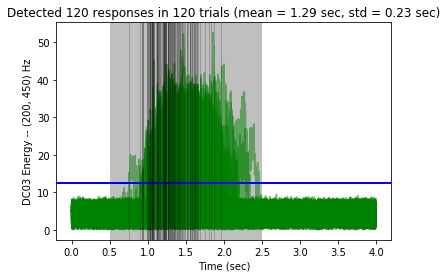

In [3]:
from segment import detect_responses
%run SyllablesAccessory-Copy1.ipynb

subject_list = [
#     'PY15N012', 
#     'PY16N005',
#     'PY14N012',
#     'PY16N011',
#     'PY15N001',
#     'PY16N006',
      'PY17N009',
#     'PY17N020'
]

subject = subject_list[0]
task = 'SyllableReading'

h5file = H5EEGFile( ecog.query_datafiles( subject, task )[0], 'r' )
eeg=h5file.group.eeg()
events = h5file.group.events()

response_aligned = True

syllables = [ 'BASELINE', 'BAH', 'PAH', 'KAH', 'GAH', 'TAH', 'DAH', 'BEE', 'PEE', 'KEE', 'GEE', 'TEE', 'DEE' ]
syllable_map = dict( [ ( 'StimulusCode_%d' % idx, s ) for idx, s in enumerate( syllables ) ] )
trial_events = [ e for e in events.query_events( 'StimulusCode', labeler = dict_labeler( syllable_map ) ) if e[ 'name' ] != 'BASELINE' ]

for e in trial_events: e[ 'duration' ] = int( 4.0 * eeg.get_rate() )
trial_frame = xcog.EventFrame( eeg, trial_events, ( -1.0, 2.0 ) )
baseline_frame = xcog.EventFrame( eeg, trial_events, ( -1.0, 0.0 ) )

if subject == 'PY17N009': 
    if task == 'SyllableReading':
        vox_responses = detect_responses( eeg, 'DC03', trial_events, length = 4.0, silent_time = 1.0, thresh_std = 5.0, 
            start_time = 0.5, stop_time = 2.5, debounce_time = 3.0, band = ( 200, 450 ), 
            smooth_window = None, plot_results = True, postfix = '', one_to_one = True, onset = True )
    elif task == 'SyllableRepetition':
        vox_responses = detect_responses( eeg, 'DC03', trial_events, length = 4.0, silent_time = 1.0, thresh_std = 3.0, 
            start_time = 0.9, stop_time = 2.5, debounce_time = 3.0, band = ( 200, 450 ), 
            smooth_window = None, plot_results = True, postfix = '', one_to_one = True, onset = True )
elif subject == 'PY16N006':
    vox_responses = detect_responses( eeg, 'ainp2', trial_events, length = 4.0, silent_time = 1.0, thresh_std = 10.0, 
        start_time = 0.5, stop_time = 2.5, debounce_time = 3.0, band = ( 200, 450 ), 
        smooth_window = None, plot_results = True, postfix = '', one_to_one = True, onset = True )
elif subject == 'PY15N001':
    vox_responses = detect_responses( eeg, 'ainp2', trial_events, length = 4.0, silent_time = 1.0, thresh_std = 5.0, 
        start_time = 0.5, stop_time = 2.5, debounce_time = 3.0, band = ( 200, 450 ), 
        smooth_window = None, plot_results = True, postfix = '', one_to_one = True, onset = True )
elif subject == 'PY16N011':
    vox_responses = detect_responses( eeg, 'ainp2', trial_events, length = 4.0, silent_time = 1.0, thresh_std = 15.0, 
        start_time = 0.5, stop_time = 2.5, debounce_time = 3.0, band = ( 200, 450 ), 
        smooth_window = None, plot_results = True, postfix = '', one_to_one = True, onset = True )
elif subject == 'PY17N008':
    vox_responses = detect_responses( eeg, 'ainp4', trial_events, length = 4.0, silent_time = 1.0, thresh_std = 15.0, 
        start_time = 0.5, stop_time = 2.5, debounce_time = 3.0, band = ( 200, 450 ), 
        smooth_window = None, plot_results = True, postfix = '', one_to_one = True, onset = True )
elif subject == 'PY14N012':
    vox_responses = detect_responses( eeg, 'ainp3', trial_events, length = 4.0, silent_time = 1.0, thresh_std = 15.0, 
        start_time = 0.5, stop_time = 2.5, debounce_time = 3.0, band = ( 200, 450 ), 
        smooth_window = None, plot_results = True, postfix = '', one_to_one = True, onset = True )
elif subject == 'PY16N005':
    vox_responses = detect_responses( eeg, 'ainp2', trial_events, length = 4.0, silent_time = 1.0, thresh_std = 15.0, 
        start_time = 0.5, stop_time = 2.5, debounce_time = 3.0, band = ( 200, 450 ), 
        smooth_window = None, plot_results = True, postfix = '', one_to_one = True, onset = True )
elif subject == 'PY15N012':
    vox_responses = detect_responses( eeg, 'ainp2', trial_events, length = 6.0, silent_time = 1.0, thresh_std = 15.0, 
        start_time = 2.0, stop_time = 4.0, debounce_time = 3.0, band = ( 200, 450 ), 
        smooth_window = None, plot_results = True, postfix = '', one_to_one = True, onset = True )
elif subject == 'PY17N020':
    vox_responses = detect_responses( eeg, 'ainp2', trial_events, length = 4.0, silent_time = 1.0, thresh_std = 15.0, 
        start_time = 0.4, stop_time = 2.5, debounce_time = 3.0, band = ( 200, 450 ), 
        smooth_window = None, plot_results = True, postfix = '', one_to_one = True, onset = True )

response_frame = xcog.EventFrame( eeg, [ v for v in vox_responses if v is not None ], ( -1.0, 1.0 ) )

if not response_aligned: 
    raw_data = trial_frame.extract()
    raw_data.append_axis_fields( 'trial', [ 'response_latency' ], [ [ r[ 'start_idx' ] - t[ 'start_idx' ] if ( r is not None and t is not None ) else 0.0 for r, t in zip( vox_responses, trial_events ) ] ])
else: raw_data = response_frame.extract()

#Defunct: Parameters for data extraction.

In [4]:
query_task = 'SyllableReading'
query_subject = 'PY17N009'

stimulus_onsets_filter = lambda e : 'StimulusCode' in e['name'] and e['name'] != 'StimulusCode_0'

extraction_window = (-2.0, +3.5)
baseline_window = (-1.5, -0.5)

fft_length = 256 # ms
fft_skip = 64 # 16 # ms
hg_band = (70.0, 200.0) # Hz

Get the ECoG data.

In [5]:
query_results = ecog.query_datafiles( query_subject, query_task )

# TODO Little kludge here
query_results = [ x for x in query_results if 'Silent' not in x ]

print('Query results:')
for i, q in enumerate( query_results ):
    print( ('(*) ' if i == 0 else '    ')
           + q )

eeg_file = H5EEGFile( query_results[0], 'r' )

group = eeg_file.group
eeg = group.eeg()
events = group.events()

Query results:
(*) /home/steve/ecog/PY17N009/PY17N009_SyllableReading.hdf5


In [6]:
stimulus_onsets = list( filter( stimulus_onsets_filter, events.events ) )
stimulus_onsets_frame = xcog.EventFrame( eeg, stimulus_onsets, extraction_window )

locked_data = stimulus_onsets_frame.extract()

In [7]:
locked_data

<xarray.DataArray (time: 11000, channel: 168, trial: 120)>
array([[[ 1.1700e+02,  1.5400e+02, ...,  1.4000e+02, -4.2000e+01],
        [ 0.0000e+00,  5.9000e+01, ...,  9.2000e+01,  7.2000e+01],
        ...,
        [ 3.2767e+04,  3.2767e+04, ...,  3.2767e+04,  3.2767e+04],
        [ 3.2768e+04,  3.2768e+04, ...,  3.2767e+04,  3.2768e+04]],

       [[ 1.1700e+02,  1.5500e+02, ...,  1.4200e+02, -4.3000e+01],
        [-2.0000e+00,  5.9000e+01, ...,  9.1000e+01,  7.2000e+01],
        ...,
        [ 3.2767e+04,  3.2767e+04, ...,  3.2767e+04,  3.2767e+04],
        [ 3.2768e+04,  3.2768e+04, ...,  3.2768e+04,  3.2768e+04]],

       ...,

       [[ 4.9000e+01,  9.0000e+00, ..., -1.0000e+00,  1.6400e+02],
        [ 9.0000e+00,  1.2300e+02, ...,  3.4000e+01,  1.3100e+02],
        ...,
        [ 3.2767e+04,  3.2767e+04, ...,  3.2767e+04,  3.2767e+04],
        [ 3.2768e+04,  3.2767e+04, ...,  3.2768e+04,  3.2768e+04]],

       [[ 4.9000e+01,  7.0000e+00, ..., -2.0000e+00,  1.6400e+02],
        [ 9.

Below two is for test

In [8]:
test_channel = 'RFG61'
test_trial = 112

Text(0.5, 0, 'Time relative to cue (s)')

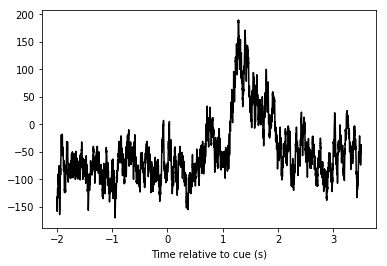

In [9]:
x = locked_data.loc[{'trial': test_trial, 'channel': test_channel}]

plt.plot( x.time, x, 'k-' )
plt.xlabel( 'Time relative to cue (s)' )

## Attempt for significance modulation

In [11]:
sys.path.append( './Segmentation' )

import ZCRwSTE as zs
from ZCRwSTE import chunks
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Lowpass
f_lp = 200.0
# ... in angular units
w_lp = f_lp / (eeg.get_rate() / 2)
# Lowpass filter order
order_lp = 4

# Highpass
f_hp = 70.0
# ... in angular units
w_hp = f_hp / (eeg.get_rate() / 2)
# Highpass filter order
order_hp = 2

b_lp, a_lp = sig.butter( order_lp, w_lp )
b_hp, a_hp = sig.butter( order_hp, w_hp, btype = 'highpass' )

In [13]:
data_filtered = xcog.pipeline.filtfilt( b_lp, a_lp, locked_data )

Text(0.5, 0, 'Time relative to cue (s)')

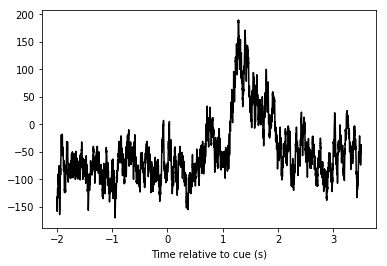

In [14]:
xfiltered = data_filtered.loc[{'trial': test_trial, 'channel': test_channel}]
plt.plot( x.time, x, 'k-' )
plt.xlabel( 'Time relative to cue (s)' )

In [44]:
numSamplesPerFrame = 32
def audioDivided(audioData):
    chunkedDataDiv = list(chunks(list(audioData), numSamplesPerFrame))
    
    energyDiv    = zs.rateSampleByEnergyLog(chunkedDataDiv)/5
    variationDiv = zs.rateSampleByVariation(chunkedDataDiv)
    zcrDiv       = zs.rateSampleByCrossingRate(chunkedDataDiv)
    entropyDiv   = zs.rateSampleByEntropy(chunkedDataDiv)
    zcrRealDiv   = zs.rateSampleByZCR(chunkedDataDiv)
    return [energyDiv,variationDiv,zcrDiv,entropyDiv,zcrRealDiv]

In [45]:
len(data)

11000

In [46]:
data = x.data
datafil = xfiltered.data
sections = 500

datadiv  = np.split(data,sections)
stats = [audioDivided(datadiv[section]) for section in range(sections)]

datadivfil = np.split(datafil,sections)
statsfil = [audioDivided(datadivfil[section]) for section in range(sections)]

In [47]:
stats = np.array(stats)
statsfil = np.array(statsfil)

energyDiv    = stats[:,0]
variationDiv = stats[:,1]
zcrDiv       = stats[:,2]
entropyDiv   = stats[:,3]
zcrRealDiv   = stats[:,4]

energyDivfil    = statsfil[:,0]
variationDivfil = statsfil[:,1]
zcrDivfil       = statsfil[:,2]
entropyDivfil   = statsfil[:,3]
zcrRealDivfil   = statsfil[:,4]

<Figure size 432x288 with 0 Axes>

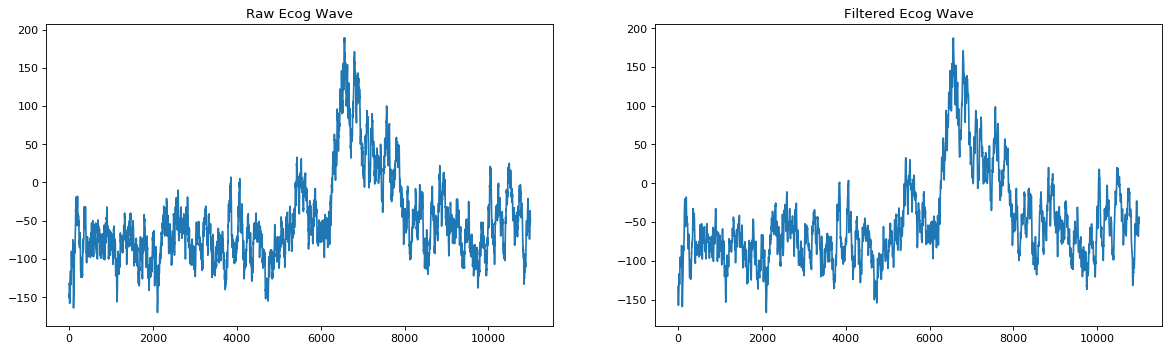

In [48]:
plt.figure(1)
fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.title('Raw Ecog Wave')
plt.plot(data)
plt.subplot(1,2,2)
plt.title('Filtered Ecog Wave')
plt.plot(datafil)
plt.show()

<Figure size 432x288 with 0 Axes>

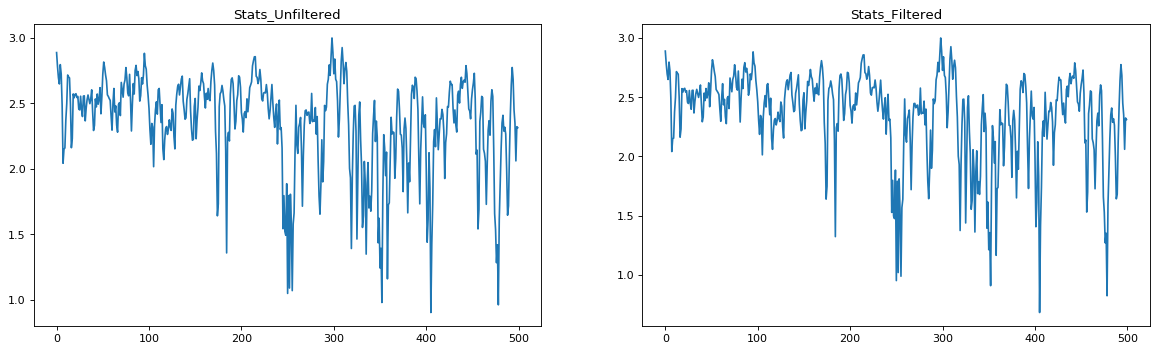

In [49]:
plt.figure(2)
fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.title('Stats_Unfiltered')
plt.plot(energyDiv)
plt.subplot(1,2,2)
plt.title('Stats_Filtered')
plt.plot(energyDivfil)
plt.show()

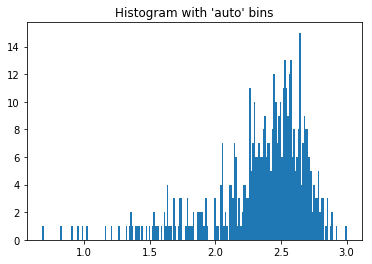

In [51]:
numBin = 200
plt.hist(energyDivfil, bins=numBin)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [53]:
from sklearn import mixture
from sklearn.mixture import GaussianMixture as GMM

In [54]:
gmmdata = np.reshape(energyDivfil,(-1,1))
gmm = GMM(n_components=2).fit(gmmdata)
labels = gmm.predict(gmmdata)

In [55]:
labels

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

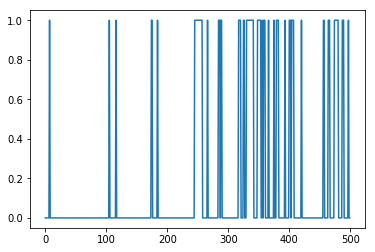

In [57]:
plt.figure()
plt.plot(labels)

Text(0.5, 0, 'Time relative to cue (s)')

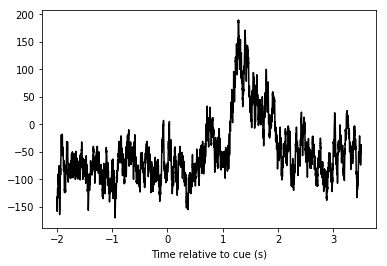

In [58]:
plt.plot( x.time, x, 'k-' )
plt.xlabel( 'Time relative to cue (s)' )

## Below is test only

Filtering.

Spectral analysis.

In [ ]:
fftsize = 256 #256 # ms
shift = 64 # ms

fftsize = int( ( fftsize / 1000.0 ) * eeg.get_rate() )
shift = int( ( shift / 1000.0 ) * eeg.get_rate() )

spectrogram_params = {
    'fs': eeg.get_rate(),
    #'window':'hamming',
    #'nperseg': fftsize,
    #'noverlap': fftsize - shift
}

In [ ]:
timefreq_data = xcog.pipeline.timefreq_fft(locked_data, axis='time',scaling='spectrum', **spectrogram_params )

In [ ]:
locked_data_spectrograms = xcog.pipeline.timefreq_fft( x, **spectrogram_params )

In [ ]:
print(locked_data_spectrograms)

In [ ]:
locked_data_spectrograms['frequency']

In [ ]:
#x = locked_data_spectrograms.loc[{'trial': test_trial, 'channel': test_channel}]
x=locked_data_spectrograms['frequency']
plt.imshow( np.log10( x ),
            origin = 'lower',
            interpolation = 'none',
            aspect = 'auto',
            extent = (x.time[0], x.time[-1], x.frequency[0], x.frequency[-1]) )

plt.ylim( 0, 250 )
plt.clim( -4, 4 )

Get metadata.

In [ ]:
subject_info = ecog.get_subject_info( query_subject )

aux_channels = subject_info['aux_channels']
bad_channels = subject_info['bad_channels']
grids = subject_info['grids']

good_channels = [c for c in eeg.get_labels()
                 if c not in aux_channels and c not in bad_channels]

In [ ]:
# Get data from the API
subject_brain = webfm.get_brain( query_subject )
subject_geometry = webfm.get_geometry( query_subject )

In [ ]:
import pip
pip.main(['list'])